# EWB paper figure 1

We provide the exact code used to generate each figure in order to be completely reproducible and to encourage others to use EWB with their own models quickly. 

In [73]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, events, config
sns.set_theme(style='whitegrid')

In [74]:
# The model is irrelevant for this plot since we are just plotting the cases but we need it to grab the data
model = 'FOUR_v200_GFS'

# grab all of our event types
event_list = [events.HeatWave,
              events.Freeze]
configuration = config.Config(
    event_types=event_list,
    )
default_forecast_config = config.ForecastSchemaConfig()
cases = evaluate.get_case_metadata(eval_config=configuration)

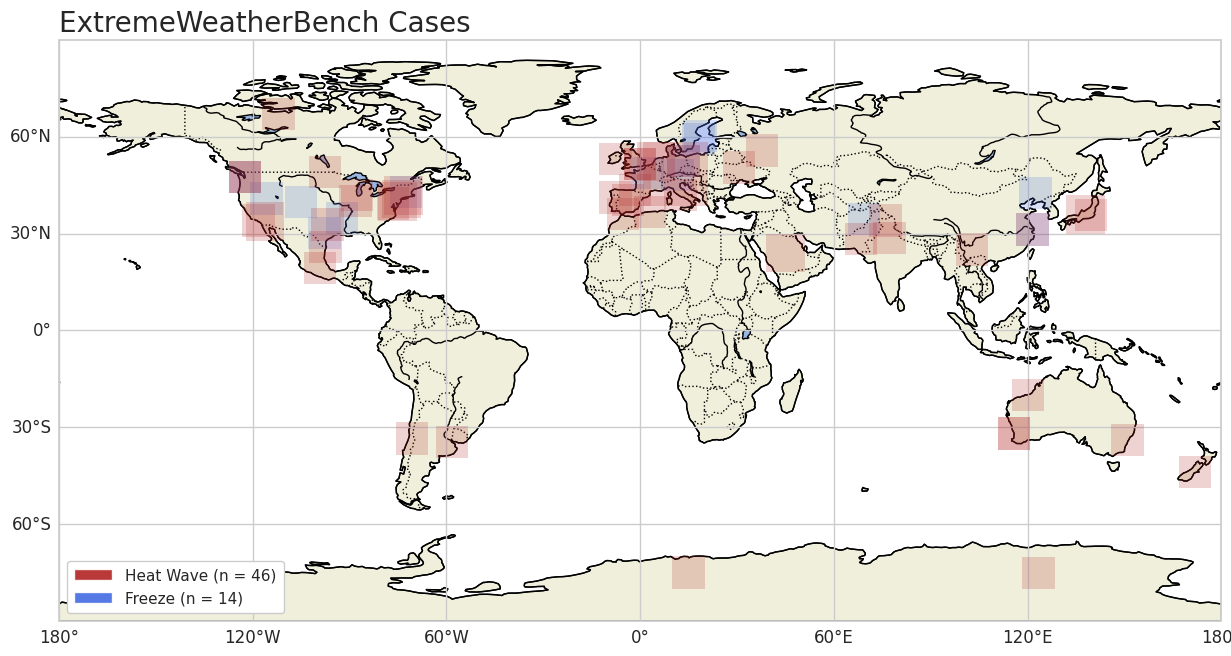

In [75]:
# plot all cases on one giant world map
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Define colors for each event type
event_colors = {
    'severe_day': 'darkslategray',
    'heat_wave': 'firebrick',
    'freeze': 'royalblue',
    
}

# Initialize counts for each event type
counts_by_type = dict({'freeze': 0, 'heat_wave': 0})

# Plot boxes for each case
for event in cases[::-1]:
    for indiv_case in event.cases:
        lat = indiv_case.location.latitude
        lon = indiv_case.location.longitude
        half_box = indiv_case.bounding_box_degrees
        
        # Get color based on event type
        event_type = indiv_case.event_type
        color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

        # count the events by type
        counts_by_type[event_type] += 1

        # Create a rectangle around the indiv_case location
        rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                linewidth=0, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.2)
        ax.add_artist(rect)

# Create a custom legend for event types
from matplotlib.patches import Patch
legend_elements = [
    #Patch(facecolor=event_colors['severe_day'], alpha=0.8, label='Severe Event']),
    Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
    Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
]
# Create a larger legend by specifying a larger font size in the prop dictionary
ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
ax.set_title('ExtremeWeatherBench Cases', loc='left', fontsize=20)
plt.savefig('extreme_weather_cases.png', transparent=True)

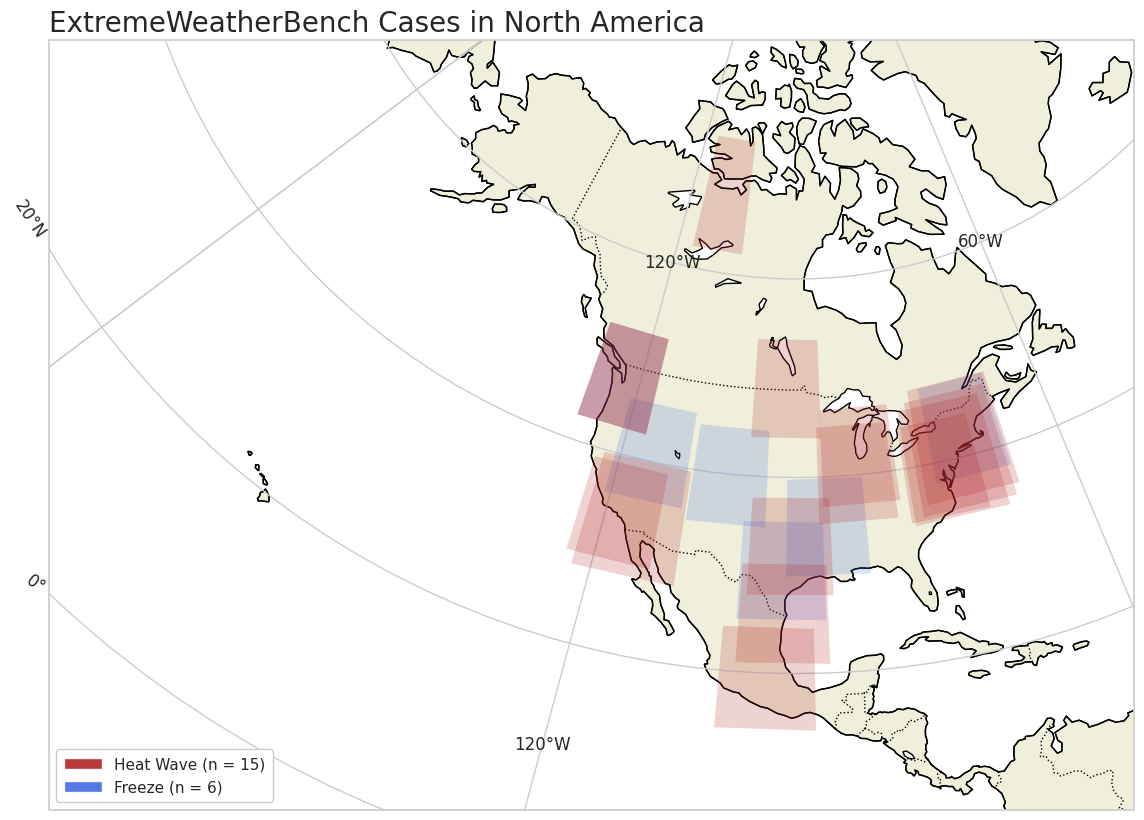

In [79]:
# plot only the North American cases 
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.LambertConformal())
#ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white')
bot_lat = 7
top_lat = 71
left_lon = -172
right_lon = -65
my_box = [left_lon, right_lon, bot_lat, top_lat]
ax.set_extent(my_box, crs=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Define colors for each event type
event_colors = {
    'severe_day': 'darkslategray',
    'heat_wave': 'firebrick',
    'freeze': 'royalblue',
    
}

# Initialize counts for each event type
counts_by_type = dict({'freeze': 0, 'heat_wave': 0})

# Plot boxes for each case
for event in cases[::-1]:
    for indiv_case in event.cases:
        lat = indiv_case.location.latitude
        lon = indiv_case.location.longitude - 360 if indiv_case.location.longitude > 180 else indiv_case.location.longitude

        # Check if the case is in North America and skip if not
        if (lat < top_lat and lat > bot_lat and lon < right_lon and lon > left_lon):
            half_box = indiv_case.bounding_box_degrees
            
            # Get color based on event type
            event_type = indiv_case.event_type
            color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

            # count the events by type
            counts_by_type[event_type] += 1

            # Create a rectangle around the indiv_case location
            rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                    linewidth=0, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.2)
            ax.add_artist(rect)

# Create a custom legend for event types
from matplotlib.patches import Patch
legend_elements = [
    #Patch(facecolor=event_colors['severe_day'], alpha=0.8, label='Severe Event']),
    Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
    Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
]
# Create a larger legend by specifying a larger font size in the prop dictionary
ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
ax.set_title('ExtremeWeatherBench Cases in North America', loc='left', fontsize=20)
plt.savefig('extreme_weather_cases_NA.png', transparent=True)

In [97]:
def plot_local_cases(left_lon, right_lon, bot_lat, top_lat, filename, plot_title):
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.LambertConformal())

    # Add coastlines and gridlines
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white')
    my_box = [left_lon, right_lon, bot_lat, top_lat]
    ax.set_extent(my_box, crs=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    # Define colors for each event type
    event_colors = {
        'severe_day': 'darkslategray',
        'heat_wave': 'firebrick',
        'freeze': 'royalblue',
        
    }

    # Initialize counts for each event type
    counts_by_type = dict({'freeze': 0, 'heat_wave': 0})

    # Plot boxes for each case
    for event in cases[::-1]:
        for indiv_case in event.cases:
            lat = indiv_case.location.latitude
            lon = indiv_case.location.longitude - 360 if indiv_case.location.longitude > 180 else indiv_case.location.longitude

            # Check if the case is in North America and skip if not
            if (lat < top_lat and lat > bot_lat and lon < right_lon and lon > left_lon):
                half_box = indiv_case.bounding_box_degrees
                
                # Get color based on event type
                event_type = indiv_case.event_type
                color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

                # count the events by type
                counts_by_type[event_type] += 1

                # Create a rectangle around the indiv_case location
                rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                        linewidth=0, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.2)
                ax.add_artist(rect)

    # Create a custom legend for event types
    from matplotlib.patches import Patch
    legend_elements = [
        #Patch(facecolor=event_colors['severe_day'], alpha=0.8, label='Severe Event']),
        Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
        Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
    ]
    # Create a larger legend by specifying a larger font size in the prop dictionary
    ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
    ax.set_title(plot_title, loc='left', fontsize=20)
    plt.savefig(filename, transparent=True)

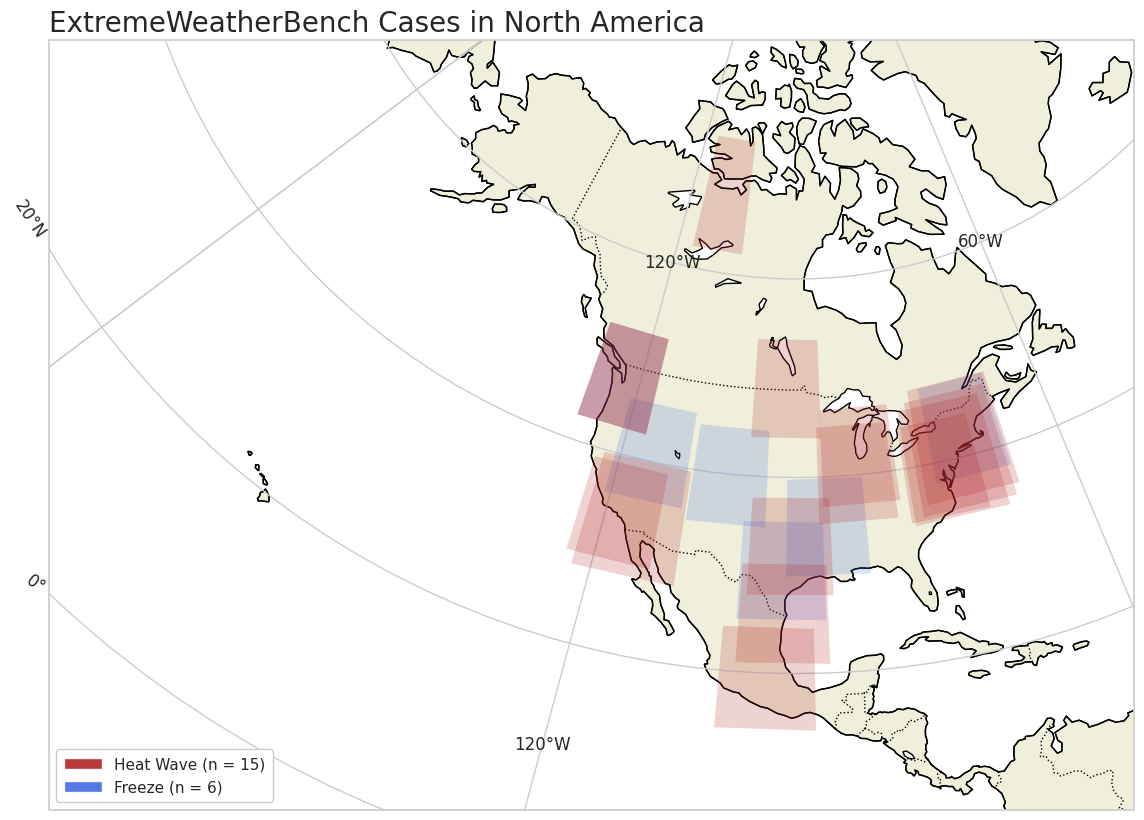

In [114]:
# plot local cases given a bounding box and information for the plot
bot_lat = 7
top_lat = 71
left_lon = -172
right_lon = -65
filename = 'extreme_weather_cases_NA.png'
plot_title = 'ExtremeWeatherBench Cases in North America'

# plot North America
plot_local_cases(left_lon, right_lon, bot_lat, top_lat, filename, plot_title)

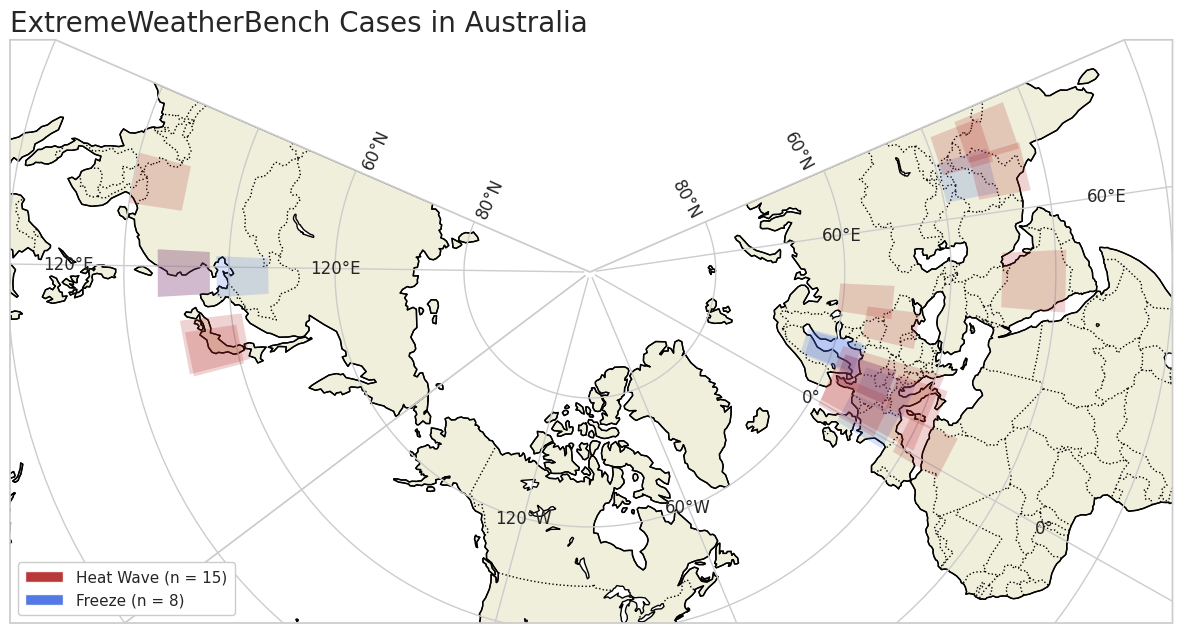

In [ ]:
# plot local cases given a bounding box and information for the plot
# this is broken
bot_lat = 0
top_lat = 180
left_lon = 0
right_lon = 180
filename = 'extreme_weather_cases_Aus.png'
plot_title = 'ExtremeWeatherBench Cases in Australia'

# plot Australia
plot_local_cases(left_lon, right_lon, bot_lat, top_lat, filename, plot_title)